<font size="6"><b>Performing the Neural Network Model</b></font>
#### Creating the Neural Network model and measuring the performance of the model.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
path = os.getcwd()
nfl_combined_data_dir_path = os.path.join(path, 'nfl_combined_data')
files = os.listdir(nfl_combined_data_dir_path)

# Reading the first file. This file will be merged with the other  
# files to create the combined file
file = os.path.join(nfl_combined_data_dir_path, files[0])
df = pd.read_excel(file)
df.head(5)

,Unnamed: 0,Home,Away,OU,OU 2H,Total Points,Win Margin,Total Points 2H,Win Margin 2H,Incomplete Passes,...,Sack,Touchdowns,Pass Touchdowns,Rush Touchdowns,Extra Point Attempts,Two Point Attempts,Field Goal Attempts,Punt Attempts,Fumble,Complete Passes
0,0,PIT,TEN,35.0,17.5,23,-3,6,6,20,...,5,2,2,0,2,0,5,12,3,55
1,1,BAL,KC,37.5,17.0,62,-14,45,31,24,...,4,8,5,2,7,0,3,8,3,42
2,2,CAR,PHI,44.5,20.5,48,28,7,7,26,...,7,6,2,2,4,0,3,8,4,31
3,3,CIN,DEN,44.5,19.5,19,5,16,16,21,...,6,2,1,1,1,1,2,15,2,38
4,4,CLE,MIN,39.5,19.0,54,14,31,31,21,...,9,6,2,3,5,0,4,11,3,35


In [3]:
frames = [] # Store the dataframes to merge to final dataframe

# Opening files and merging the files to make one file.
for i in range(1, len(files)):
    file = os.path.join(nfl_combined_data_dir_path, files[i])
    df_temp = pd.read_excel(file)
    frames.append(df_temp)
    
df = pd.concat(frames)

In [4]:
df.tail(5)

,Unnamed: 0,Home,Away,OU,OU 2H,Total Points,Win Margin,Total Points 2H,Win Margin 2H,Incomplete Passes,...,Sack,Touchdowns,Pass Touchdowns,Rush Touchdowns,Extra Point Attempts,Two Point Attempts,Field Goal Attempts,Punt Attempts,Fumble,Complete Passes
219,219,KC,LAC,48.0,23.0,52,-10,35,7,21,...,3,7,3,3,7,0,1,5,0,47
220,220,LA,ARI,49.0,22.5,55,-7,28,28,30,...,2,7,5,2,7,0,3,7,3,56
221,221,DEN,OAK,41.5,20.5,31,-1,18,12,28,...,4,2,2,0,1,1,8,8,7,46
222,222,PHI,SEA,46.0,20.0,26,8,13,1,21,...,9,3,2,1,2,1,2,11,6,46
223,223,KC,HOU,48.0,27.0,82,-20,30,4,25,...,1,7,4,3,6,1,4,2,2,49


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2107 entries, 0 to 223
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2107 non-null   int64  
 1   Home                  2107 non-null   object 
 2   Away                  2107 non-null   object 
 3   OU                    2107 non-null   float64
 4   OU 2H                 2107 non-null   float64
 5   Total Points          2107 non-null   int64  
 6   Win Margin            2107 non-null   int64  
 7   Total Points 2H       2107 non-null   int64  
 8   Win Margin 2H         2107 non-null   int64  
 9   Incomplete Passes     2107 non-null   int64  
 10  Touchbacks            2107 non-null   int64  
 11  Interceptions         2107 non-null   int64  
 12  Fumble Forced         2107 non-null   int64  
 13  Fumble Not Forced     2107 non-null   int64  
 14  Safety                2107 non-null   int64  
 15  Penalty               

In [6]:
df.shape

(2107, 29)

In [7]:
df = df.drop('Unnamed: 0', axis=1) # Dropping the "Unnamed column"

In [8]:
df.sample(5, random_state=0)

,Home,Away,OU,OU 2H,Total Points,Win Margin,Total Points 2H,Win Margin 2H,Incomplete Passes,Touchbacks,...,Sack,Touchdowns,Pass Touchdowns,Rush Touchdowns,Extra Point Attempts,Two Point Attempts,Field Goal Attempts,Punt Attempts,Fumble,Complete Passes
59,CAR,TB,46.0,23.5,31,3,25,-3,20,8,...,2,3,1,2,2,1,6,9,3,36
169,GB,WAS,42.0,20.5,35,-5,15,9,20,8,...,8,4,2,2,3,1,3,10,3,34
46,BUF,NYG,48.0,23.0,34,14,15,15,27,3,...,3,4,4,0,3,1,3,15,3,48
56,SF,ARI,41.0,20.0,46,10,26,26,33,7,...,5,7,3,3,3,3,1,12,5,44
28,MIA,CLE,42.5,22.0,54,-6,25,11,26,8,...,5,6,3,2,3,1,7,11,4,49


In [9]:
df.columns

Index(['Home', 'Away', 'OU', 'OU 2H', 'Total Points', 'Win Margin',
       'Total Points 2H', 'Win Margin 2H', 'Incomplete Passes', 'Touchbacks',
       'Interceptions', 'Fumble Forced', 'Fumble Not Forced', 'Safety',
       'Penalty', 'Tackled For Loss', 'Rush Attempts', 'Pass Attempts', 'Sack',
       'Touchdowns', 'Pass Touchdowns', 'Rush Touchdowns',
       'Extra Point Attempts', 'Two Point Attempts', 'Field Goal Attempts',
       'Punt Attempts', 'Fumble', 'Complete Passes'],
      dtype='object')

In [10]:
df.describe()

,OU,OU 2H,Total Points,Win Margin,Total Points 2H,Win Margin 2H,Incomplete Passes,Touchbacks,Interceptions,Fumble Forced,...,Sack,Touchdowns,Pass Touchdowns,Rush Touchdowns,Extra Point Attempts,Two Point Attempts,Field Goal Attempts,Punt Attempts,Fumble,Complete Passes
count,2107.000000,2107.000000,2107.000000,2107.000000,2107.000000,2107.000000,2107.000000,2107.000000,2107.000000,2107.000000,...,2107.000000,2107.000000,2107.000000,2107.000000,2107.000000,2107.000000,2107.000000,2107.000000,2107.000000,2107.000000
mean,45.195301,22.353109,45.661130,-2.355007,22.470337,12.464642,24.552444,5.940674,1.783579,1.687708,...,4.686284,5.142857,3.122924,1.608448,4.494067,0.300427,3.877551,9.293783,2.517323,43.420503
std,4.206470,3.148794,13.928219,14.610070,9.827547,10.578475,6.140294,2.842626,1.315282,1.320183,...,2.339799,2.133930,1.773387,1.253290,2.000080,0.608904,1.786359,3.261414,1.649213,8.248671
min,8.000000,16.000000,6.000000,-58.000000,0.000000,-21.000000,8.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,20.000000
25%,42.500000,20.500000,36.000000,-10.500000,16.000000,6.000000,20.000000,4.000000,1.000000,1.000000,...,3.000000,4.000000,2.000000,1.000000,3.000000,0.000000,3.000000,7.000000,1.000000,38.000000
50%,45.000000,21.500000,45.000000,-3.000000,21.000000,12.000000,24.000000,6.000000,2.000000,1.000000,...,4.000000,5.000000,3.000000,1.000000,4.000000,0.000000,4.000000,9.000000,2.000000,43.000000
75%,47.750000,24.000000,54.000000,7.000000,28.000000,20.000000,28.000000,8.000000,3.000000,2.000000,...,6.000000,7.000000,4.000000,2.000000,6.000000,0.000000,5.000000,11.000000,3.000000,48.000000
max,60.500000,56.000000,101.000000,49.000000,59.000000,57.000000,48.000000,16.000000,8.000000,7.000000,...,15.000000,14.000000,13.000000,7.000000,13.000000,6.000000,11.000000,21.000000,11.000000,92.000000


In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

print(df['Home'].values)
print(df['Away'].values)

ohe_tfmr = OneHotEncoder(sparse=False)
print(ohe_tfmr.fit_transform(df[['Home']].values))
print(ohe_tfmr.fit_transform(df[['Away']].values))

['NO' 'NYG' 'CHI' ... 'DEN' 'PHI' 'KC']
['MIN' 'CAR' 'DET' ... 'OAK' 'SEA' 'HOU']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
# Feature values
categorical_features = ["Home", "Away"]

numerical_features = ["OU", "OU 2H", "Win Margin", "Total Points 2H", "Win Margin 2H",
                "Incomplete Passes", "Touchbacks", "Interceptions", "Fumble Forced",
                "Fumble Not Forced", "Safety", "Penalty", "Tackled For Loss", "Rush Attempts", "Pass Attempts",
                "Sack", "Touchdowns", "Pass Touchdowns", "Rush Touchdowns", "Extra Point Attempts",
                "Two Point Attempts", "Field Goal Attempts", "Punt Attempts", "Fumble", "Complete Passes"]

target = "Total Points"

In [13]:
# Handling categorical values.
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
cat_steps = [cat_ohe_step]
cat_pipe = Pipeline(cat_steps)
cat_transformers = [('cat', cat_pipe, categorical_features)]

# Handling numerical values
num_si_step = ('si', SimpleImputer(strategy='median'))
num_scl_step = ('scl', MinMaxScaler())
# num_scl_step = ('scl', StandardScaler())
num_steps = [num_si_step, num_scl_step]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, numerical_features)]

ct = ColumnTransformer(transformers=cat_transformers + num_transformers)
ct.fit(df[categorical_features + numerical_features])

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Home', 'Away']),
                                ('num',
                                 Pipeline(steps=[('si',
                                                  SimpleImputer(strategy='median')),
                                                 ('scl', MinMaxScaler())]),
                                 ['OU', 'OU 2H', 'Win Margin',
                                  'Total Points 2H', 'Win Margin 2H',
                                  'Incomplete Passes', 'Touchbacks',
                                  'Interceptions', 'Fumble Forced',
                                  'Fumble Not Forced', 'Safety', 'Penalty',
                                  'Tackled For Loss', 'Rush Attempts',
      

In [14]:
from sklearn.model_selection import train_test_split

X = ct.transform(df[categorical_features + numerical_features])
X

array([[0.        , 0.        , 0.        , ..., 0.55      , 0.18181818,
        0.30555556],
       [0.        , 0.        , 0.        , ..., 0.3       , 0.36363636,
        0.19444444],
       [0.        , 0.        , 0.        , ..., 0.6       , 0.63636364,
        0.31944444],
       ...,
       [0.        , 0.        , 0.        , ..., 0.35      , 0.63636364,
        0.36111111],
       [0.        , 0.        , 0.        , ..., 0.5       , 0.54545455,
        0.36111111],
       [0.        , 0.        , 0.        , ..., 0.05      , 0.18181818,
        0.40277778]])

In [15]:
# y = df[[target]].values
y = df[target]
y = y.values.reshape(-1,1)
scaler = MinMaxScaler()
# scaler = StandardScaler()
y = scaler.fit_transform(y)
y

array([[0.17894737],
       [0.45263158],
       [0.28421053],
       ...,
       [0.26315789],
       [0.21052632],
       [0.8       ]])

In [16]:
X.shape

(2107, 89)

In [17]:
y.shape

(2107, 1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

X_train.shape

(1685, 89)

In [19]:
X_test.shape

(422, 89)

In [20]:
y_train.shape

(1685,)

In [21]:
y_test.shape

(422,)

In [22]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.4       , 0.18181818,
        0.43055556],
       [0.        , 0.        , 0.        , ..., 0.4       , 0.27272727,
        0.40277778],
       [0.        , 0.        , 0.        , ..., 0.05      , 0.18181818,
        0.40277778],
       ...,
       [0.        , 0.        , 1.        , ..., 0.65      , 0.18181818,
        0.33333333],
       [0.        , 0.        , 0.        , ..., 0.4       , 0.18181818,
        0.27777778],
       [0.        , 0.        , 0.        , ..., 0.25      , 0.18181818,
        0.31944444]])

In [23]:
y_train

array([0.55789474, 0.50526316, 0.8       , ..., 0.32631579, 0.52631579,
       0.38947368])

In [24]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

ann_model = Sequential()
ann_model.add(Dense(10, input_dim = 89, activation = 'relu'))
ann_model.add(Dense(7, activation = 'relu'))
ann_model.add(Dense(1, activation = 'linear'))

In [25]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                900       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 77        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
Total params: 985
Trainable params: 985
Non-trainable params: 0
_________________________________________________________________


In [26]:
ann_model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
epoch_hist = ann_model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=1, validation_split=0.2)

Epoch 1/100
27/27 [==============================] - 3s 70ms/step - loss: 0.2290 - val_loss: 0.0671
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0487 - val_loss: 0.0238
Epoch 3/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0237 - val_loss: 0.0210
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0211 - val_loss: 0.0186
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0163
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0155 - val_loss: 0.0144
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0131 - val_loss: 0.0127
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0116 - val_loss: 0.0110
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.0096
Epoch 10/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 0.0083
Epoch 11

27/27 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 84/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 85/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 86/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 87/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 88/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 89/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 90/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 91/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 92/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 93/100


In [28]:
epoch_hist.history.keys()

dict_keys(['loss', 'val_loss'])

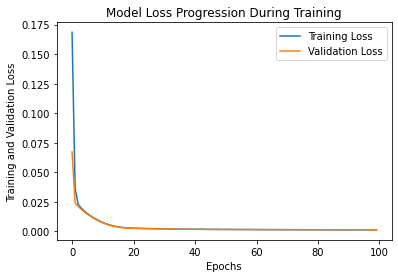

In [29]:
plt.plot(epoch_hist.history['loss'])
plt.plot(epoch_hist.history['val_loss'])
plt.title('Model Loss Progression During Training')
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

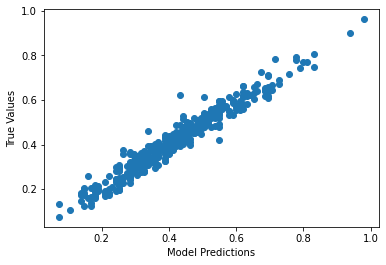

In [30]:
y_predict = ann_model.predict(X_test)
plt.scatter(y_test, y_predict)
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.show()

In [31]:
y_test = y_test.reshape(-1,1)
y_predict = y_predict.reshape(-1,1)

y_test_orig = scaler.inverse_transform(y_test)
y_predict_orig = scaler.inverse_transform(y_predict)

In [32]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

mse = mean_squared_error(y_test_orig, y_predict_orig)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 10.902876889602256
RMSE: 3.3019504674665026
MAE: 2.5118033693865014
R2: 0.9451586938147961
